# WeatherPy
----

### Analysis
* High Temperature near the equator. When latitude between (-20,0) and (0,-20) ,the temperature increases . when the   latitude near poles the temperature  decreases

* When the latitude is 30 degrees, the highest temperature areas mostly deserts .

* When the latitude is less or very high , the humidity is less .But the mid latitude areas having hiest humid         points.

* Wind speed appears to slightly increase as we move away from the equator.





In [47]:
# Dependencies and Setup

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import seaborn as sns
from datetime import datetime

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [49]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
   # print (city)
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count

len(cities)


609

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [50]:

# Create base URL and indicate imperial units
url =( 'http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=' + api_key)
url

'http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=45dd0a2ef6784d9c5da1bc6119719b1f'

In [51]:
#Initiate counter for city number below
number = 1
set_count = 0

#Lists for holding required items
city_name = []
lat = []
lng = []
temp = []
humid = []
clouds = []
wind = []
country=[]
Date=[]
max_temp=[]

#Loop through each city, extract required items, and print result
print('------------------------------')
print(' Beginning Data Retrieval ')
print('------------------------------')

for city in cities:
    set_count += 1
    try:
        city_data = (requests.get(url + '&q=' + city)).json()
        #print(city_data)
        city_name.append(city_data['name'])
        Date.append(city_data['dt'])
        country.append(city_data['sys']['country'])
        lat.append(city_data['coord']['lat'])
        lng.append(city_data['coord']['lon'])
        temp.append(city_data['main']['temp'])
        max_temp.append(city_data['main']['temp_max'])
        humid.append(city_data['main']['humidity'])
        clouds.append(city_data['clouds']['all'])
        wind.append(city_data['wind']['speed'])
        print(f'City number {number} of set{set_count} complete. | {city}')
        number = number + 1
    
    except KeyError:
        print(f'City not found.Skipping...')
        number = number + 1
        
print('------------------------------')
print('End of Records')
print('------------------------------')

------------------------------
 Beginning Data Retrieval 
------------------------------
City number 1 of set1 complete. | jamestown
City not found.Skipping...
City number 3 of set3 complete. | mataura
City number 4 of set4 complete. | agucadoura
City not found.Skipping...
City number 6 of set6 complete. | vaini
City number 7 of set7 complete. | aklavik
City number 8 of set8 complete. | punta arenas
City number 9 of set9 complete. | canoinhas
City number 10 of set10 complete. | yinchuan
City number 11 of set11 complete. | airai
City number 12 of set12 complete. | hun
City number 13 of set13 complete. | longyearbyen
City number 14 of set14 complete. | pisco
City number 15 of set15 complete. | khatanga
City number 16 of set16 complete. | ushuaia
City number 17 of set17 complete. | half moon bay
City number 18 of set18 complete. | saint george
City number 19 of set19 complete. | thompson
City number 20 of set20 complete. | yellowknife
City number 21 of set21 complete. | qaanaaq
City numbe

City number 188 of set188 complete. | san patricio
City number 189 of set189 complete. | tobetsu
City number 190 of set190 complete. | saint anthony
City number 191 of set191 complete. | matagami
City not found.Skipping...
City number 193 of set193 complete. | leh
City number 194 of set194 complete. | okha
City number 195 of set195 complete. | ribeira grande
City number 196 of set196 complete. | smithers
City number 197 of set197 complete. | natal
City not found.Skipping...
City number 199 of set199 complete. | ponta delgada
City number 200 of set200 complete. | guarda
City number 201 of set201 complete. | hofn
City number 202 of set202 complete. | namwala
City number 203 of set203 complete. | fez
City not found.Skipping...
City number 205 of set205 complete. | ratnapura
City number 206 of set206 complete. | avera
City number 207 of set207 complete. | tautira
City number 208 of set208 complete. | oni
City number 209 of set209 complete. | machala
City number 210 of set210 complete. | ma

City number 367 of set367 complete. | teknaf
City not found.Skipping...
City number 369 of set369 complete. | san luis
City number 370 of set370 complete. | two rivers
City number 371 of set371 complete. | luang prabang
City number 372 of set372 complete. | kununurra
City number 373 of set373 complete. | zaysan
City number 374 of set374 complete. | dongsheng
City number 375 of set375 complete. | magburaka
City number 376 of set376 complete. | kavieng
City number 377 of set377 complete. | vostok
City number 378 of set378 complete. | lachi
City number 379 of set379 complete. | susanville
City number 380 of set380 complete. | wawa
City number 381 of set381 complete. | tulun
City number 382 of set382 complete. | urucara
City number 383 of set383 complete. | yerbogachen
City number 384 of set384 complete. | hamilton
City number 385 of set385 complete. | tilichiki
City number 386 of set386 complete. | alberton
City number 387 of set387 complete. | juneau
City number 388 of set388 complete. |

City number 548 of set548 complete. | florianopolis
City number 549 of set549 complete. | keskin
City number 550 of set550 complete. | merauke
City number 551 of set551 complete. | bata
City number 552 of set552 complete. | yar-sale
City number 553 of set553 complete. | lata
City not found.Skipping...
City number 555 of set555 complete. | lundazi
City number 556 of set556 complete. | aripuana
City number 557 of set557 complete. | latur
City number 558 of set558 complete. | adiake
City number 559 of set559 complete. | itarema
City number 560 of set560 complete. | batagay-alyta
City number 561 of set561 complete. | victor harbor
City number 562 of set562 complete. | toba tek singh
City number 563 of set563 complete. | rioblanco
City number 564 of set564 complete. | wanning
City number 565 of set565 complete. | klyuchi
City number 566 of set566 complete. | hualmay
City number 567 of set567 complete. | severo-kurilsk
City number 568 of set568 complete. | lulea
City number 569 of set569 com

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [98]:
#Create a dataframe with required items
city_data_df = pd.DataFrame({'City': city_name,
                             'Country': country,
                             'Date':Date,
                            'Latitude': lat,
                            'Longitude': lng,
                            'Temperature': temp,
                            'Humidity': humid,
                            'Cloudiness': clouds,
                             'Max_Temp': max_temp,
                            'Wind Speed': wind
                            })

#Save dataframe as csv
pd.DataFrame.to_csv(city_data_df, 'city_data.csv')



In [95]:
city_data_df.head()

,City,Country,Date,Latitude,Longitude,Temperature,Humidity,Cloudiness,Max_Temp,Wind Speed
0,Jamestown,AU,1553634971,-33.21,138.60,42.87,80,0,42.87,5.50
1,Mataura,NZ,1553634605,-46.19,168.86,53.01,91,44,53.01,18.01
2,Agucadoura,PT,1553634918,41.43,-8.78,62.22,58,0,66.00,3.36
3,Vaini,IN,1553634972,15.34,74.49,70.59,93,20,70.59,1.70
4,Aklavik,CA,1553630400,68.22,-135.01,35.19,69,40,37.40,5.82


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

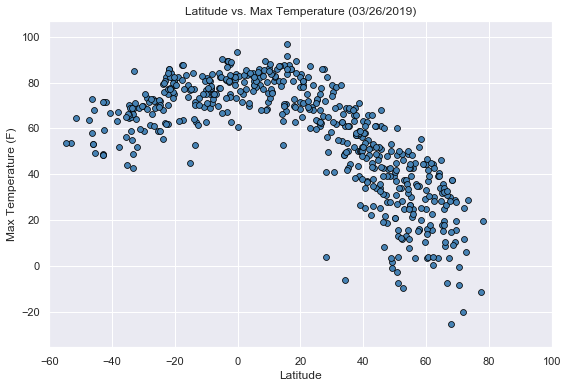

In [65]:
# Set the aesthetic using Seaborn
sns.set()

# Increase the size of the figure
plt.figure(figsize=(9,6))

# Plot the lat vs the max temp
plt.scatter(x = city_data_df['Latitude'], y = city_data_df['Max_Temp'],
            linewidths = 0.75, edgecolors = 'black', color = 'steelblue', s=35)

# Add labeling
# This extracts the date and returns it in the local time zone
weather_dt = datetime.fromtimestamp(city_data_df.loc[0,"Date"]).strftime('%m/%d/%Y')
plt.title(f"Latitude vs. Max Temperature ({weather_dt})")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")

# Modify xlim,ylim
plt.xlim(-60,100)
plt.ylim(min(city_data_df['Max_Temp']) - 10, max(city_data_df['Max_Temp']) + 10)

#plt.grid()
plt.show()

#### Latitude vs. Humidity Plot

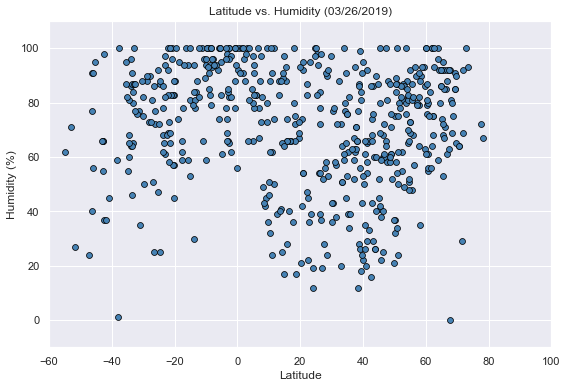

In [59]:
# Set the aesthetic using Seaborn
sns.set()
# Increase the size of the figure
plt.figure(figsize=(9,6))

# Plot the lat vs the max temp
plt.scatter(x = city_data_df['Latitude'], y = city_data_df['Humidity'],
            linewidths = 0.75, edgecolors = 'black', color = 'steelblue', s=35)

# Add labeling
# This extracts the date and returns it in the local time zone
weather_dt = datetime.fromtimestamp(city_data_df.loc[0,"Date"]).strftime('%m/%d/%Y')
plt.title(f"Latitude vs. Humidity ({weather_dt})")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")

# Modify xlim,ylim
plt.xlim(-60,100)
plt.ylim(-10, 110)
#plt.grid()

plt.show()

#### Latitude vs. Cloudiness Plot

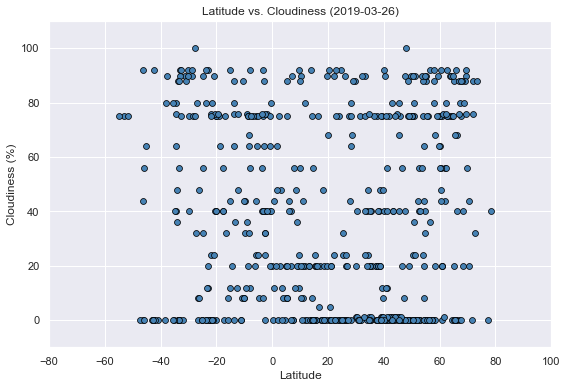

In [61]:
# Set the aesthetic using Seaborn
sns.set()
# Increase the size of the figure
plt.figure(figsize=(9,6))

# Plot the lat vs the max temp
plt.scatter(x = city_data_df['Latitude'], y = city_data_df['Cloudiness'],
            linewidths = 0.75, edgecolors = 'black', color = 'steelblue', s=35)

# Add labeling
# This extracts the date and returns it in the local time zone
weather_dt = datetime.fromtimestamp(city_data_df.loc[0,"Date"]).strftime('%Y-%m-%d')
plt.title(f"Latitude vs. Cloudiness ({weather_dt})")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
#plt.grid()
# Modify xlim ylim
plt.xlim(-80,100)
plt.ylim(-10, 110)


plt.show()

#### Latitude vs. Wind Speed Plot

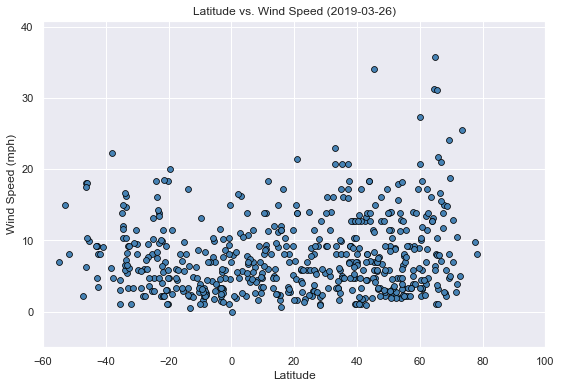

In [63]:

# Set the aesthetic using Seaborn
sns.set()
# Increase the size of the figure
plt.figure(figsize=(9,6))

# Plot the lat vs the max temp
plt.scatter(x = city_data_df['Latitude'], y = city_data_df['Wind Speed'],
            linewidths = 0.75, edgecolors = 'black', color = 'steelblue', s=35)

# Add labeling
# This extracts the date and returns it in the local time zone
weather_dt = datetime.fromtimestamp(city_data_df.loc[0,"Date"]).strftime('%Y-%m-%d')
plt.title(f"Latitude vs. Wind Speed ({weather_dt})")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")

# Modify ticks
plt.xlim(-60,100)
plt.ylim(-5, max(city_data_df['Wind Speed']+5))
#plt.grid()

plt.show()
